<a href="https://colab.research.google.com/github/bengosney/Advent-Of-Code-2018/blob/master/AdventOfCode_2018_day_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advent of Code - Day 6

## The input
Nothing to see here...

In [1]:
with open('day6') as f:
  data = f.read()
data = data.splitlines()

FileNotFoundError: ignored

## Part One

In [0]:
import numpy as np
from pprint import pprint

In [0]:
MAX_X = 0
MAX_Y = 0

for line in data:
  x, y = map(int, line.split(', '))
  MAX_X = max(MAX_X, x)
  MAX_Y = max(MAX_Y, y)
  
MAX_X += 1
MAX_Y += 1
print(MAX_X, MAX_Y)

355 357


In [0]:
def get_dist(pos, goal):
  px, py = pos
  gx, gy = goal
  
  return abs(px - gx) + abs(py - gy)


grid = [[(0,10000) for j in range(-1, MAX_X+1)] for i in range(-1, MAX_Y+1)]
i = 0
region = 0
for line in data:
  i += 1
  x, y = map(int, line.split(', '))
  
  for lx in range(0, MAX_X):
    for ly in range(0, MAX_Y):
      gid, dist = grid[lx][ly]
      if gid == i:
        continue
        
      my_dist = get_dist((lx,ly), (x,y))
      
      if my_dist < dist:
        grid[lx][ly] = (i, my_dist)
      elif my_dist == dist:
        grid[lx][ly] = (0, my_dist)


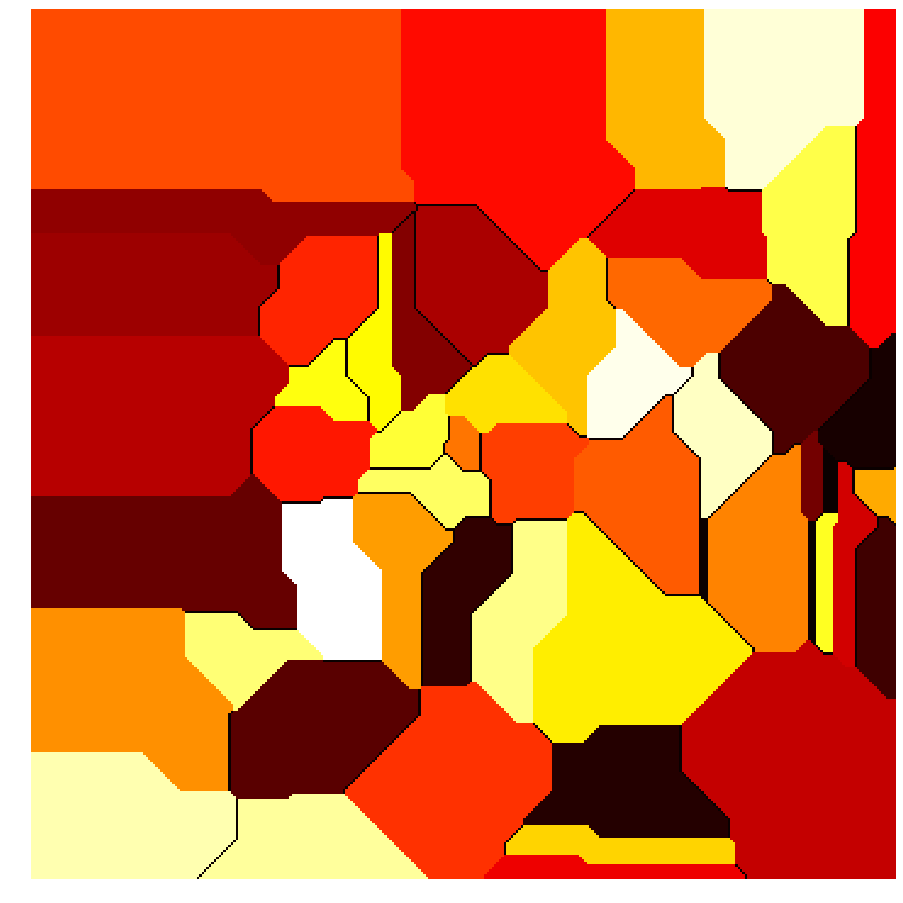

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

debug_grid = np.zeros((MAX_Y, MAX_X))
for cx in range(0, MAX_X):
  for cy in range(0, MAX_Y):
    gid, dist = grid[cx][cy]
    debug_grid[cy][cx] = gid
    
    
fig = plt.figure(figsize=(18,16))
ax = plt.gca()
plt.axis('off')
plt.imshow(debug_grid, cmap='hot')
plt.show()

In [0]:
from collections import defaultdict

counts = defaultdict(int)

for row in grid:
  for cell in row:
    i, _ = cell
    counts[i] += 1
    
pprint(counts)

defaultdict(<class 'int'>,
            {0: 3318,
             1: 1010,
             2: 2647,
             3: 1598,
             4: 1028,
             5: 2459,
             6: 3342,
             7: 5094,
             8: 295,
             9: 1146,
             10: 2773,
             11: 3949,
             12: 2497,
             13: 6296,
             14: 6763,
             15: 791,
             16: 2064,
             17: 758,
             18: 2161,
             19: 7722,
             20: 1583,
             21: 1877,
             22: 4367,
             23: 1437,
             24: 11578,
             25: 2674,
             26: 1881,
             27: 238,
             28: 2689,
             29: 4713,
             30: 1707,
             31: 285,
             32: 3001,
             33: 1854,
             34: 1057,
             35: 983,
             36: 4829,
             37: 871,
             38: 688,
             39: 396,
             40: 685,
             41: 2304,
             42: 816,
    

In [0]:
edges = []

first_row = None
last_row = None

for row in grid:
  if first_row == None:
    first_row = row
    
  last_row = row
  
  first_cell = None
  last_cell = None
  for cell in row:
    if first_cell == None:
      first_cell = cell
    last_cell = cell
    
  gid, _ = first_cell
  edges.append(gid)
  gid, _ = last_cell
  edges.append(gid)
  
for cell in first_row:
  gid, _ = cell
  edges.append(gid)
  
for cell in last_row:
  gid, _ = cell
  edges.append(gid)

edges = list(set(edges))
print(edges, len(edges))

[0, 32, 7, 10, 11, 45, 46, 14, 48, 17, 18, 19, 13, 22, 24, 29] 16


In [0]:
biggest = 0

for gid, count in counts.items():
  if gid in edges:
    continue
    
  if count > biggest:
    biggest = count
    
print(biggest)

skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
skip
4829


## Part Two

In [0]:
pt_area = 0

grid_pt2 = [[0 for j in range(-1, MAX_X+1)] for i in range(-1, MAX_Y+1)]

for gx in range(0, MAX_X):
  for gy in range(0, MAX_Y):
    distances = {}
    i = 0
    for line in data:
      x, y = map(int, line.split(', '))
      distances[i] = get_dist((gx,gy), (x,y))   
      i += 1
      
    tot = sum(distances.values())
      
    if tot < 10000:
      grid_pt2[gx][gy] = tot
      pt_area += 1
      
      
print(pt_area)

46966


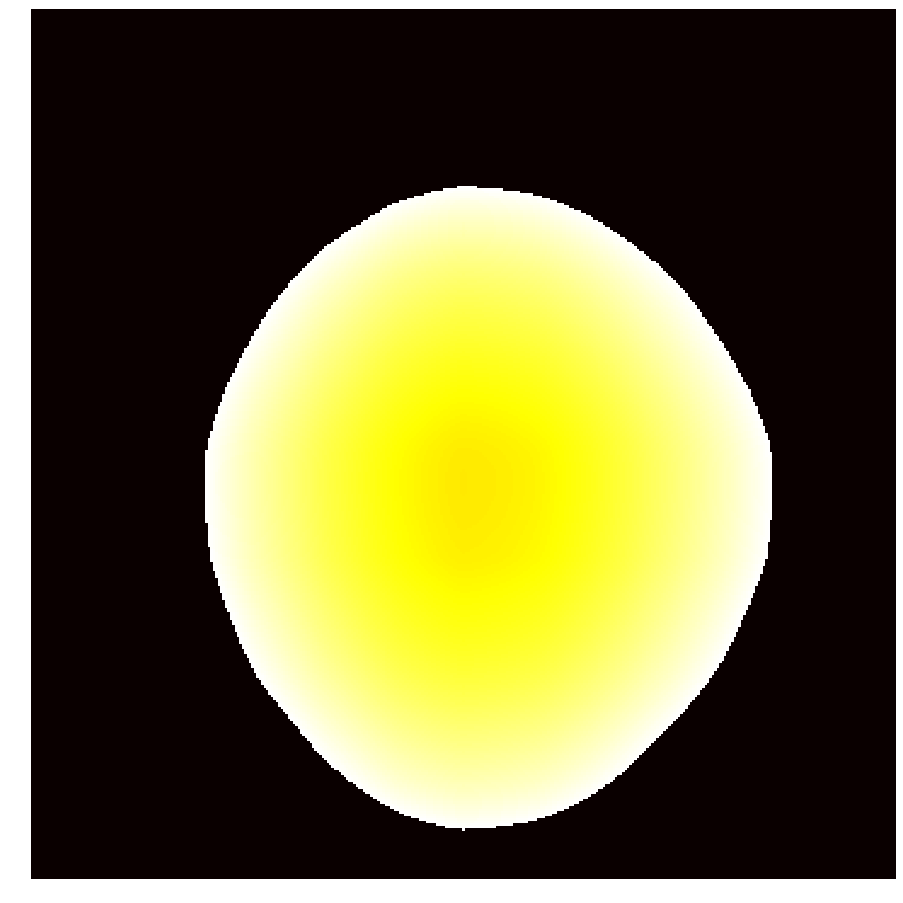

In [0]:
fig = plt.figure(figsize=(18,16))
ax = plt.gca()
plt.axis('off')
plt.imshow(grid_pt2, cmap='hot')
plt.show()